Imported Data for Giraffas from Drive

In [0]:
#=======INPUT LOCATION LAT/LONG=======#
Location = (-22.8151,-43.2472)

#=======INPUT PATH TO DATAFRAME FILE=======#
pandas_file = '/gdrive/Shared drives/INF560/Code/Data Files/Dataframes/data6-Giraffas.csv'

#=======OUTPUT FILE PATH=======#
output_file = '/gdrive/Shared drives/INF560/Code/Code Files/pickles/loc6model.pkl'

import pandas as pd
df=pd.read_excel(pandas_file)

In [0]:
df.head(5)

,Unnamed: 0,0,1,2,3
0,0,3.4,Level 3,24:46:c8:b2:02:6d,2019-12-04 09:52:48.951 UTC
1,1,3.4,Level 3,40:4d:7f:b9:d8:73,2019-12-23 03:58:21.243 UTC
2,2,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-07 10:47:04.637 UTC
3,3,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-11 04:41:00.159 UTC
4,4,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-08 04:44:50.271 UTC


In [0]:
df = df.drop('Unnamed: 0', 1)

In [0]:
df

,0,1,2,3
0,3.4,Level 3,24:46:c8:b2:02:6d,2019-12-04 09:52:48.951 UTC
1,3.4,Level 3,40:4d:7f:b9:d8:73,2019-12-23 03:58:21.243 UTC
2,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-07 10:47:04.637 UTC
3,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-11 04:41:00.159 UTC
4,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-08 04:44:50.271 UTC
...,...,...,...,...
3741,3.4,Level 3,a8:16:d0:6d:00:df,2019-12-08 17:07:53.357 UTC
3742,3.4,Level 3,dc:bf:e9:95:e4:2b,2019-12-20 05:04:31.235 UTC
3743,3.4,Level 3,94:fb:29:05:86:5b,2019-12-05 23:23:21.169 UTC
3744,3.4,Level 3,b0:47:bf:c3:3d:61,2019-12-24 20:47:30.41 UTC


In [0]:
df.columns = ['Ratings', 'level','MAC-ID','Timestamp']

In [0]:
df

,Ratings,level,MAC-ID,Timestamp
0,3.4,Level 3,24:46:c8:b2:02:6d,2019-12-04 09:52:48.951 UTC
1,3.4,Level 3,40:4d:7f:b9:d8:73,2019-12-23 03:58:21.243 UTC
2,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-07 10:47:04.637 UTC
3,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-11 04:41:00.159 UTC
4,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-08 04:44:50.271 UTC
...,...,...,...,...
3741,3.4,Level 3,a8:16:d0:6d:00:df,2019-12-08 17:07:53.357 UTC
3742,3.4,Level 3,dc:bf:e9:95:e4:2b,2019-12-20 05:04:31.235 UTC
3743,3.4,Level 3,94:fb:29:05:86:5b,2019-12-05 23:23:21.169 UTC
3744,3.4,Level 3,b0:47:bf:c3:3d:61,2019-12-24 20:47:30.41 UTC


Formatted the Timestamps into dateTime types from string 

In [0]:
df['Timestamp'] = df['Timestamp'].str.replace(r'UTC', '')

In [0]:
df.head(5)

,Ratings,level,MAC-ID,Timestamp
0,3.4,Level 3,24:46:c8:b2:02:6d,2019-12-04 09:52:48.951
1,3.4,Level 3,40:4d:7f:b9:d8:73,2019-12-23 03:58:21.243
2,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-07 10:47:04.637
3,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-11 04:41:00.159
4,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-08 04:44:50.271


In [0]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [0]:
df1=df

In [0]:
df1.head(5)

,Ratings,level,MAC-ID,Timestamp
0,3.4,Level 3,24:46:c8:b2:02:6d,2019-12-04 09:52:48.951
1,3.4,Level 3,40:4d:7f:b9:d8:73,2019-12-23 03:58:21.243
2,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-07 10:47:04.637
3,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-11 04:41:00.159
4,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-08 04:44:50.271


Grouped the data by the MAC ID and sorted by Timestamp . This was done to extract consecutive wait times between 2 timestamps which is indicative of the time duration for which a user has been around this location .

In [0]:
df1=df1.sort_values('Timestamp', ascending=True)

In [0]:
df1.head(5)

,Ratings,level,MAC-ID,Timestamp
3480,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 01:20:51.130
1997,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 01:41:07.142
1273,3.4,Level 3,c0:25:e9:7f:32:c1,2019-12-01 01:43:34.206
3327,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 02:05:08.112
560,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 02:11:48.116


Computed the wait-time in seconds 

In [0]:
df1['Wait-Time']=df1['Timestamp'].diff().astype('timedelta64[s]')

In [0]:
df1['Wait-Time'].fillna((df1['Wait-Time'].mean()), inplace=True)

In [0]:
df1.head(50)

,Ratings,level,MAC-ID,Timestamp,Wait-Time
3480,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 01:20:51.130,690.361816
1997,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 01:41:07.142,1216.000000
1273,3.4,Level 3,c0:25:e9:7f:32:c1,2019-12-01 01:43:34.206,147.000000
3327,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 02:05:08.112,1293.000000
560,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 02:11:48.116,400.000000
708,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 02:11:48.117,0.000000
2321,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 02:22:28.117,640.000000
1939,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 03:47:23.233,5095.000000
3076,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 03:52:03.159,279.000000
1511,3.4,Level 3,c4:86:e9:6d:ab:1d,2019-12-01 04:01:42.254,579.000000


Extracted the location of various gates by the flights that depart from them in terminal two ( Google Maps & Aeroporto de galeo website data ) and computed the GeoPy distance between the current outlet and the Gates .

In [0]:
Gate_Delta = (-22.8151,-43.2457)

In [0]:
Gate_United= (-22.8151,-43.2455)

In [0]:
Gate_AA= (-22.8148,-43.2449)

In [0]:
Gate_Emirates= (-22.8141,-43.2453)

In [0]:
Gate_Lufthansa= (-22.8142,-43.2457)

In [0]:
Gate_Copa = (-22.8140,-43.2455)

In [0]:
Gate_AirFrance = (-22.8141,-43.2460)

In [0]:
Gate_AirArg = (-22.8142,-43.2454)

In [0]:
Gate_Airitalia = (-22.8142,-43.2460)

In [0]:
from geopy.distance import vincenty

In [0]:
df1['dist_DA'] = vincenty(Location,Gate_Delta).meters

In [0]:
df1['dist_UA'] =vincenty(Location,Gate_United).meters

In [0]:
df1['dist_AA'] =vincenty(Location,Gate_AA).meters

In [0]:
df1['dist_EM']= vincenty(Location,Gate_Emirates).meters

In [0]:
df1['dist_LF']= vincenty(Location,Gate_Lufthansa).meters

In [0]:
df1['dist_Copa'] = vincenty(Location,Gate_Copa).meters

In [0]:
df1['dist_AF']  = vincenty(Location,Gate_AirFrance).meters

In [0]:
df1['dist_AG'] = vincenty(Location,Gate_AirArg).meters

In [0]:
df1['dist_AI'] = vincenty(Location,Gate_Airitalia).meters

Appended the geodistances in meters as additional columns in the dataframe

In [0]:
df1.head(5)

,Ratings,level,MAC-ID,Timestamp,Wait-Time,dist_DA,dist_UA,dist_AA,dist_EM,dist_LF,dist_Copa,dist_AF,dist_AG,dist_AI
3480,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 01:20:51.130,690.361816,153.992462,174.524791,238.447782,224.301629,183.432281,212.83369,165.651829,209.955921,158.462682
1997,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 01:41:07.142,1216.000000,153.992462,174.524791,238.447782,224.301629,183.432281,212.83369,165.651829,209.955921,158.462682
1273,3.4,Level 3,c0:25:e9:7f:32:c1,2019-12-01 01:43:34.206,147.000000,153.992462,174.524791,238.447782,224.301629,183.432281,212.83369,165.651829,209.955921,158.462682
3327,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 02:05:08.112,1293.000000,153.992462,174.524791,238.447782,224.301629,183.432281,212.83369,165.651829,209.955921,158.462682
560,3.4,Level 3,50:3e:aa:33:18:c3,2019-12-01 02:11:48.116,400.000000,153.992462,174.524791,238.447782,224.301629,183.432281,212.83369,165.651829,209.955921,158.462682


Performed Binning of the data into target risk levels based on stats from the following link:

[AirlineFlightDelays Stats : A Survey](https://stat-or.unc.edu/files/2018/09/Paper3_MSOM_2012_AirlineFlightDelays.pdf)


Target Variable recommended risk levels -
**Encoding Scheme :**

*   Low Risk - 0
*   Medium Risk - 1


*   High Risk -2





In [0]:
median=df1['Wait-Time'].median()

In [0]:
percentile_75 = df1['Wait-Time'].quantile(q=0.75)

In [0]:
percentile_25 = df1['Wait-Time'].quantile(q=0.25)

In [0]:
df1.shape

(3746, 14)

In [0]:
df1['Risk-level'] = 0

In [0]:
df1.loc[ (df1['Wait-Time'] > median) & (df1.Ratings >= 3.0 ),'Risk-level'] = 2

In [0]:
df1.loc[ (df1['Wait-Time'] <= median) & (df1['Wait-Time'] > percentile_25)  & (df1.Ratings >= 3.0 ),'Risk-level'] = 1

In [0]:
df1.loc[(df1['Wait-Time'] <= percentile_25 ) & (df1.Ratings >= 3.0 ),'Risk-level'] = 0

In [0]:
len(df1[df1['Risk-level']==2])

1871

In [0]:
df1.shape

(3746, 15)

In [0]:
df1= df1.drop('Timestamp', 1)


In [0]:
df1= df1.drop('MAC-ID', 1)
df1= df1.drop('level',1)

In [0]:
df1.shape

(3746, 12)

(0.0, 100.0)

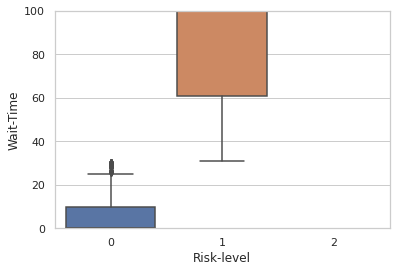

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
tips = df1
ax = sns.boxplot(x=df1['Risk-level'],y=df1['Wait-Time'])
ax.set_ylim([0, 100])

Data has now been completely preprocessed and ready for analysis 

Train-test Split Performed : ( 80:20 split taken . 80% for training the model and 20% for testing the model ) . Will use the training set itself to perform 10 fold cross validation for model selection

In [0]:
data_x= df1.iloc[:,0:11]
data_y =df1.iloc[:,11:12]

In [0]:
import math
trainVal = math.trunc(df1.shape[0]*.8)
numRows = df1.shape[0]

In [0]:
train_x = data_x.iloc[0:trainVal,:]
train_y = data_y.iloc[0:trainVal,:]
test_x = data_x.iloc[trainVal:numRows,:]
test_y = data_y.iloc[trainVal:numRows,:]

In [0]:
from sklearn.utils import shuffle
train_x,train_y = shuffle(train_x,train_y)

In [0]:
test_x,test_y = shuffle(test_x,test_y)

In [0]:
test_x.shape

(750, 11)

# Logistic Regression Model

In [0]:
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

In [0]:
mdl = LogisticRegressionCV(cv=10)

In [0]:
mdl.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
preds_y=mdl.predict(test_x)

In [0]:
training_acc = mdl.score(train_x,train_y)
test_acc = mdl.score(test_x,test_y)

Evaluation Metrics : Accuracy , Precision , Recall , F-1 score and Area under the curve - Reason for selection of these metrics ( Classification problem statement )

In [0]:
test_acc 

1.0

In [0]:
from sklearn import metrics
from sklearn.metrics import classification_report

confusion_mat = metrics.confusion_matrix(test_y,preds_y)
report_Logistic=classification_report(test_y,preds_y)

In [0]:
print(confusion_mat)

[[122   0   0]
 [  0 146   0]
 [  0   0 482]]


In [0]:
print(report_Logistic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       482

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [0]:
classes = [0,1,2]
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from itertools import cycle
from scipy import interp
from sklearn.preprocessing import label_binarize
def report_multi_class(train_X_norm, train_Y, test_Y, y_predict, y_score):
    lw = 2
    con_matrix = confusion_matrix(test_Y, y_predict)    
    train_Y = label_binarize(train_Y, classes=classes)
    test_Y = label_binarize(test_Y, classes=classes)
    y_predict = label_binarize(y_predict, classes=classes)
    n_classes = train_Y.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'pink', 'olive', 
                    'brown', 'wheat'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="upper left")
    plt.show()
    
    print("Confusion Matrix: \n", con_matrix)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


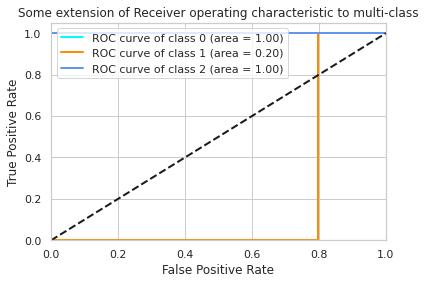

Confusion Matrix: 
 [[122   0   0]
 [  0 146   0]
 [  0   0 482]]


In [0]:
y_score = mdl.decision_function(test_x)
report_multi_class(train_x, train_y, test_y, preds_y, y_score)

# RBF Kernelized Support vector machine 

In [0]:
from sklearn.svm import SVC
from sklearn import svm

mdl_svm=svm.SVC(kernel='rbf')
mdl_svm.fit(train_x,train_y)
preds_svm=mdl_svm.predict(test_x)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
test_acc_svm = mdl_svm.score(test_x,test_y)

Evaluation Metrics : Accuracy , precision , recall , F1-score and Area under the curve

In [0]:
test_acc_svm

0.936

In [0]:
from sklearn import metrics
from sklearn.metrics import classification_report

confusion_mat_svm = metrics.confusion_matrix(test_y,preds_svm)
report_svm=classification_report(test_y,preds_svm)

In [0]:
print(confusion_mat_svm)
print(report_svm)

[[122   0   0]
 [ 35 111   0]
 [  0  13 469]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       122
           1       0.90      0.76      0.82       146
           2       1.00      0.97      0.99       482

    accuracy                           0.94       750
   macro avg       0.89      0.91      0.89       750
weighted avg       0.94      0.94      0.94       750



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


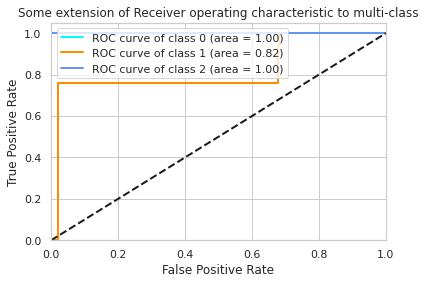

Confusion Matrix: 
 [[122   0   0]
 [ 35 111   0]
 [  0  13 469]]


In [0]:
y_score_svm = mdl_svm.decision_function(test_x)
report_multi_class(train_x, train_y, test_y, preds_svm, y_score_svm)

# Multinomial Naive Bayes Classifier reinforced by one vs all classifier

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [0]:
mdl2= OneVsRestClassifier(MultinomialNB())

In [0]:
mdl2.fit(train_x,train_y)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [0]:
pred_y_NB=mdl2.predict(test_x)

In [0]:
training_acc_NB = mdl2.score(train_x,train_y)
test_acc_NB = mdl2.score(test_x,test_y)

Evaluation Metrics : Accuracy , precision , recall , F1-score 

In [0]:
test_acc_NB

0.7546666666666667

In [0]:
from sklearn import metrics
from sklearn.metrics import classification_report

confusion_mat_NB = metrics.confusion_matrix(test_y,pred_y_NB)
report_NB=classification_report(test_y,pred_y_NB)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print(confusion_mat_NB)

[[  0 122   0]
 [  0 146   0]
 [  0  62 420]]


In [0]:
print(report_NB)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.44      1.00      0.61       146
           2       1.00      0.87      0.93       482

    accuracy                           0.75       750
   macro avg       0.48      0.62      0.51       750
weighted avg       0.73      0.75      0.72       750



# K Nearest Neighbors Classifier 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
mdl3=KNeighborsClassifier(n_neighbors=5)

In [0]:
mdl3.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
preds_KNN=mdl3.predict(test_x)

In [0]:
training_acc_KNN = mdl3.score(train_x,train_y)
test_acc_KNN = mdl3.score(test_x,test_y)

Evaluation Metrics : Accuracy ,Precision ,recall and F1-score 

In [0]:
test_acc_KNN

0.9986666666666667

In [0]:
from sklearn import metrics

confusion_mat_KNN = metrics.confusion_matrix(test_y,preds_KNN)
report_KNN=classification_report(test_y,preds_KNN)

In [0]:
print(confusion_mat_KNN)
print(report_KNN)

[[122   0   0]
 [  0 146   0]
 [  0   1 481]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       0.99      1.00      1.00       146
           2       1.00      1.00      1.00       482

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



# Random forest classifier ( Boosted decision trees )

In [0]:
from sklearn.ensemble import RandomForestClassifier

mdl_RF = RandomForestClassifier(n_estimators=10,oob_score =True,class_weight='balanced',max_depth=20)
mdl_RF.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
preds_RF=mdl_RF.predict(test_x)


Evaluation Metrics : Out of Bag error estimate , Confusion Matrix 

In [0]:
confusion_mat = confusion_matrix(test_y,preds_RF)
report_RF=classification_report(test_y,preds_RF)
oob_score = mdl_RF.oob_score_
oob_error = 1 - oob_score

print("OOB score: ",oob_score)
print("Out of bag error estimate test data: ",oob_error)
print("Confusion Matrix test data:\n",confusion_mat)

OOB score:  0.992656875834446
Out of bag error estimate test data:  0.007343124165554049
Confusion Matrix test data:
 [[122   0   0]
 [  0 146   0]
 [  0   0 482]]


After comparing the evaluation metrics of the above built classifiers and the efficiency and complexity of the model in runtime considering that we would be compressing the model as a pickle file to deploy it in the back end of a web application , RBF SVM seem ideal for this scenario 

In [0]:
import pickle

In [0]:
pickle.dump(mdl_svm, open(output_file,'wb'))

In [0]:
pickle_loader = pickle.load(open(output_file,'rb'))

In [0]:
preds_production=pickle_loader.predict(test_x)

In [0]:
pickle_loader.score(test_x,test_y)

0.936

In [0]:
test_x.head()

,Ratings,Wait-Time,dist_DA,dist_UA,dist_AA,dist_EM,dist_LF,dist_Copa,dist_AF,dist_AG,dist_AI
1895,3.4,3647.0,153.992462,174.524791,238.447782,224.301629,183.432281,212.83369,165.651829,209.955921,158.462682
1739,3.4,37.0,153.992462,174.524791,238.447782,224.301629,183.432281,212.83369,165.651829,209.955921,158.462682
678,3.4,1747.0,153.992462,174.524791,238.447782,224.301629,183.432281,212.83369,165.651829,209.955921,158.462682
3423,3.4,2455.0,153.992462,174.524791,238.447782,224.301629,183.432281,212.83369,165.651829,209.955921,158.462682
1993,3.4,0.0,153.992462,174.524791,238.447782,224.301629,183.432281,212.83369,165.651829,209.955921,158.462682
